In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tip = tips[['tip','total_bill']]

In [ ]:
tip

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


##Min Max Scaller

In [ ]:
#min max scaller
scaler = preprocessing.MinMaxScaler()
scaler.fit(tip)
tip_min_max = scaler.transform(tip)
tip_min_max = pd.DataFrame(tip_min_max,columns=['tip','total_bill'])
tip_min_max.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


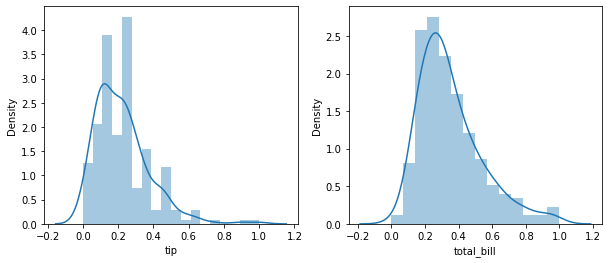

In [ ]:
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(tip_min_max['tip'])
plt.subplot(1,2,2)
sns.distplot(tip_min_max['total_bill'])
plt.show()

## Standar Scaller

In [ ]:
#standar scaller
standar = preprocessing.StandardScaler()
standar.fit(tip)
tip_standar = standar.transform(tip)
tip_standar = pd.DataFrame(tip_standar,columns=['tip','total_bill'])
tip_standar.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


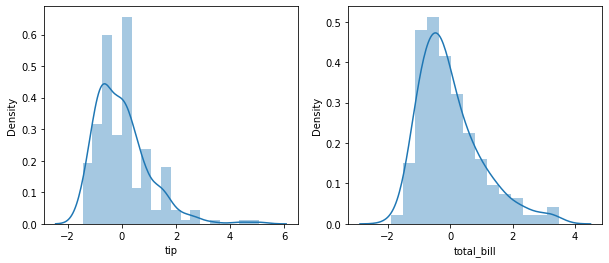

In [ ]:
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(tip_standar['tip'])
plt.subplot(1,2,2)
sns.distplot(tip_standar['total_bill'])
plt.show()

## Robust Scaller

In [ ]:
#Robust scaller
robust = preprocessing.RobustScaler()
robust.fit(tip)
tip_robust= robust.transform(tip)
tip_robust = pd.DataFrame(tip_robust,columns=['tip','total_bill'])
tip_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


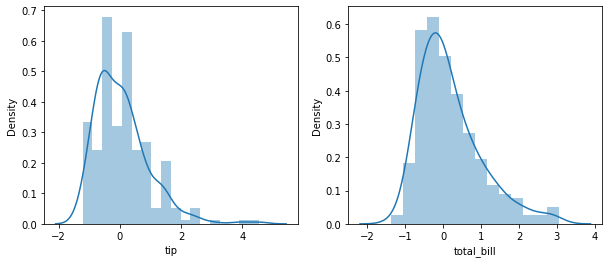

In [ ]:
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(tip_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(tip_robust['total_bill'])
plt.show()

## Apply Ridge

In [ ]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [ ]:
#One hot encoding
col = ['Female','Male','No','Yes','Dinner','Lunch']
ohe = preprocessing.OneHotEncoder()
tip_ohe = pd.DataFrame(ohe.fit_transform(tips[['sex','smoker','time']]).toarray(),columns=col)
tip_ohe = tip_ohe.astype(int)
tip_ohe

,Female,Male,No,Yes,Dinner,Lunch
0,1,0,1,0,1,0
1,0,1,1,0,1,0
2,0,1,1,0,1,0
3,0,1,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
239,0,1,1,0,1,0
240,1,0,0,1,1,0
241,0,1,0,1,1,0
242,0,1,1,0,1,0


In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
#Binary encoding
col_day = ['Thur', 'Fri', 'Sat', 'Sun']
label_binary = preprocessing.LabelBinarizer()
tip_bin = pd.DataFrame(label_binary.fit_transform(tips['day']),columns=col_day)
tip_bin

,Thur,Fri,Sat,Sun
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


In [ ]:
#no Treatment
tip_size = pd.DataFrame(tips['size'])
tip_size.head()

,size
0,2
1,3
2,3
3,2
4,4


In [ ]:
#Robust scaller
robust = preprocessing.RobustScaler()
robust.fit_transform(tips[['total_bill','tip']])
tip_rob = pd.DataFrame(tip_robust,columns=['total_bill','tip'])
tip_rob

,total_bill,tip
0,-0.074675,-1.2096
1,-0.691558,-0.7936
2,0.298237,0.3840
3,0.545918,0.2624
4,0.630334,0.4544
...,...,...
239,1.042208,1.9328
240,0.870594,-0.5760
241,0.452226,-0.5760
242,0.002319,-0.7360


In [ ]:
x = tip_ohe.join(tip_bin)
X = x.join(tip_size)
X = X.join(tip_rob['total_bill'])
X

,Female,Male,No,Yes,Dinner,Lunch,Thur,Fri,Sat,Sun,size,total_bill
0,1,0,1,0,1,0,0,0,1,0,2,-0.074675
1,0,1,1,0,1,0,0,0,1,0,3,-0.691558
2,0,1,1,0,1,0,0,0,1,0,3,0.298237
3,0,1,1,0,1,0,0,0,1,0,2,0.545918
4,1,0,1,0,1,0,0,0,1,0,4,0.630334
...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,1,0,0,1,0,0,3,1.042208
240,1,0,0,1,1,0,0,1,0,0,2,0.870594
241,0,1,0,1,1,0,0,1,0,0,2,0.452226
242,0,1,1,0,1,0,0,1,0,0,2,0.002319


In [ ]:
y = tip_rob['tip']
y

0     -1.2096
1     -0.7936
2      0.3840
3      0.2624
4      0.4544
        ...  
239    1.9328
240   -0.5760
241   -0.5760
242   -0.7360
243    0.0640
Name: tip, Length: 244, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3, 
    random_state = 10) 

In [ ]:
rg = Ridge() 
rg.fit(X_train, y_train)

y_pred_train = rg.predict(X_train)
y_pred_test = rg.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

coefficients = rg.coef_

print(mse_train)
print(mse_test)
print(coefficients)

0.4172804172029642
0.4217415224339909
[ 0.04669415 -0.04669415  0.04438062 -0.04438062 -0.05975843  0.05975843
  0.05185446 -0.00588797  0.01577298 -0.06173947  0.07909184  0.73372931]
